In [1]:
import os
os.chdir("../")
%pwd

'/home/malik-harris/dental'

In [2]:
import os
import pandas as pd

final_data_dir = "data/Final_data"
splits = ["train", "test", "val"]
for split in splits:
    data = []
    split_dir = os.path.join(final_data_dir, split)
    for class_dir in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_dir)
        if not os.path.isdir(class_path):
            continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            data.append({"image_path": img_path, "label": class_dir})
    df = pd.DataFrame(data)
    df.to_csv(os.path.join(final_data_dir, f"{split}_labels.csv"), index=False)
    print(f"Saved {split}_labels.csv with {len(df)} entries.")

Saved train_labels.csv with 1495 entries.
Saved test_labels.csv with 215 entries.
Saved val_labels.csv with 429 entries.


In [3]:
import os
import pandas as pd

final_data_dir = "data/Final_data"
splits = ["train", "test",  "val"]

# First, get all unique class names from both splits
all_classes = set()
for split in splits:
    split_dir = os.path.join(final_data_dir, split)
    for class_dir in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_dir)
        if os.path.isdir(class_path):
            all_classes.add(class_dir)
class_list = sorted(list(all_classes))
class_to_idx = {cls: idx for idx, cls in enumerate(class_list)}

# Save the mapping for reference
pd.DataFrame(list(class_to_idx.items()), columns=["class", "label_encoded"]).to_csv(
    os.path.join(final_data_dir, "class_encoding.csv"), index=False
)

# Now, add label encoding to each split CSV
for split in splits:
    csv_path = os.path.join(final_data_dir, f"{split}_labels.csv")
    df = pd.read_csv(csv_path)
    df["label_encoded"] = df["label"].map(class_to_idx)
    df.to_csv(csv_path, index=False)
    print(f"Updated {csv_path} with label encoding.")

Updated data/Final_data/train_labels.csv with label encoding.
Updated data/Final_data/test_labels.csv with label encoding.
Updated data/Final_data/val_labels.csv with label encoding.


In [4]:
import pandas as pd
final_data_dir = "data/Final_data"
splits = ["train", "val", "test"]

image_sets = {}
for split in splits:
    df = pd.read_csv(os.path.join(final_data_dir, f"{split}_labels.csv"))
    image_sets[split] = set(df['image_path'].apply(lambda x: os.path.basename(x)))

for s1 in splits:
    for s2 in splits:
        if s1 != s2:
            overlap = image_sets[s1] & image_sets[s2]
            print(f"Overlap between {s1} and {s2}: {len(overlap)} images")
            if overlap:
                print(list(overlap)[:10])

Overlap between train and val: 0 images
Overlap between train and test: 0 images
Overlap between val and train: 0 images
Overlap between val and test: 0 images
Overlap between test and train: 0 images
Overlap between test and val: 0 images


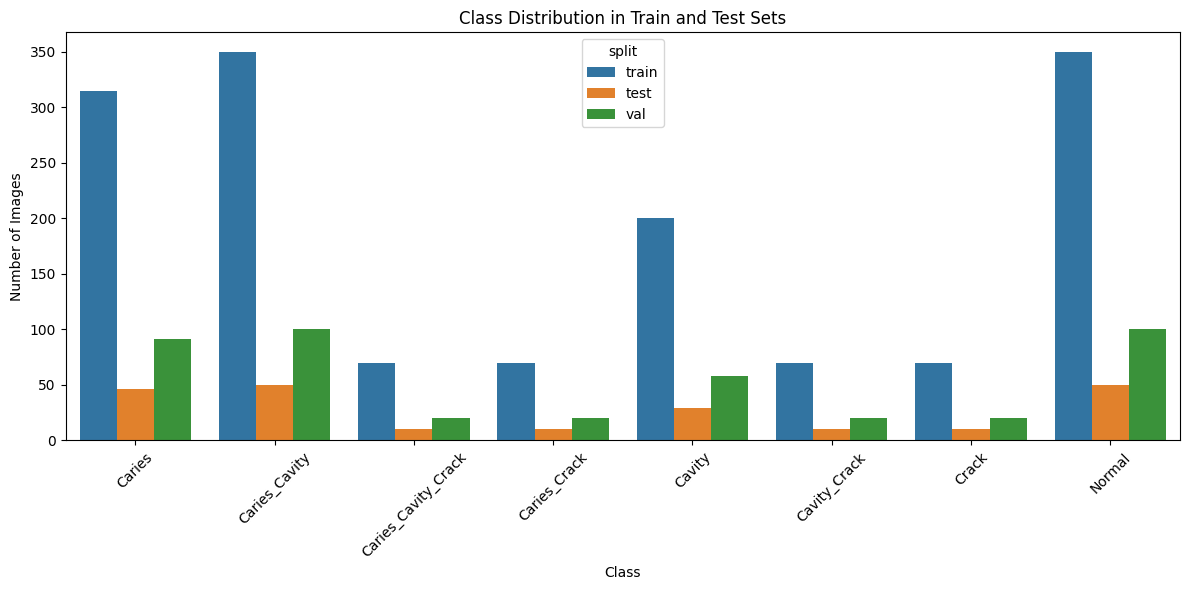

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

final_data_dir = "data/Final_data"
splits = ["train", "test",  "val"]

dfs = []
for split in splits:
    csv_path = os.path.join(final_data_dir, f"{split}_labels.csv")
    df = pd.read_csv(csv_path)
    df["split"] = split
    dfs.append(df)
df_all = pd.concat(dfs)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_all, x="label", hue="split", order=sorted(df_all["label"].unique()))
plt.title("Class Distribution in Train and Test Sets")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
for split in splits:
    df = pd.read_csv(os.path.join(final_data_dir, f"{split}_labels.csv"))
    print(f"\nClass distribution in {split}:")
    print(df['label'].value_counts())


Class distribution in train:
label
Caries_Cavity          350
Normal                 350
Caries                 315
Cavity                 200
Crack                   70
Caries_Cavity_Crack     70
Cavity_Crack            70
Caries_Crack            70
Name: count, dtype: int64

Class distribution in test:
label
Caries_Cavity          50
Normal                 50
Caries                 46
Cavity                 29
Crack                  10
Caries_Cavity_Crack    10
Cavity_Crack           10
Caries_Crack           10
Name: count, dtype: int64

Class distribution in val:
label
Caries_Cavity          100
Normal                 100
Caries                  91
Cavity                  58
Crack                   20
Caries_Cavity_Crack     20
Cavity_Crack            20
Caries_Crack            20
Name: count, dtype: int64


In [7]:
import os

for split in splits:
    df = pd.read_csv(os.path.join(final_data_dir, f"{split}_labels.csv"))
    missing = [p for p in df['image_path'] if not os.path.exists(p)]
    print(f"{split}: {len(missing)} missing files")
    if missing:
        print(missing[:10])  # Show up to 10 missing files

train: 0 missing files
test: 0 missing files
val: 0 missing files


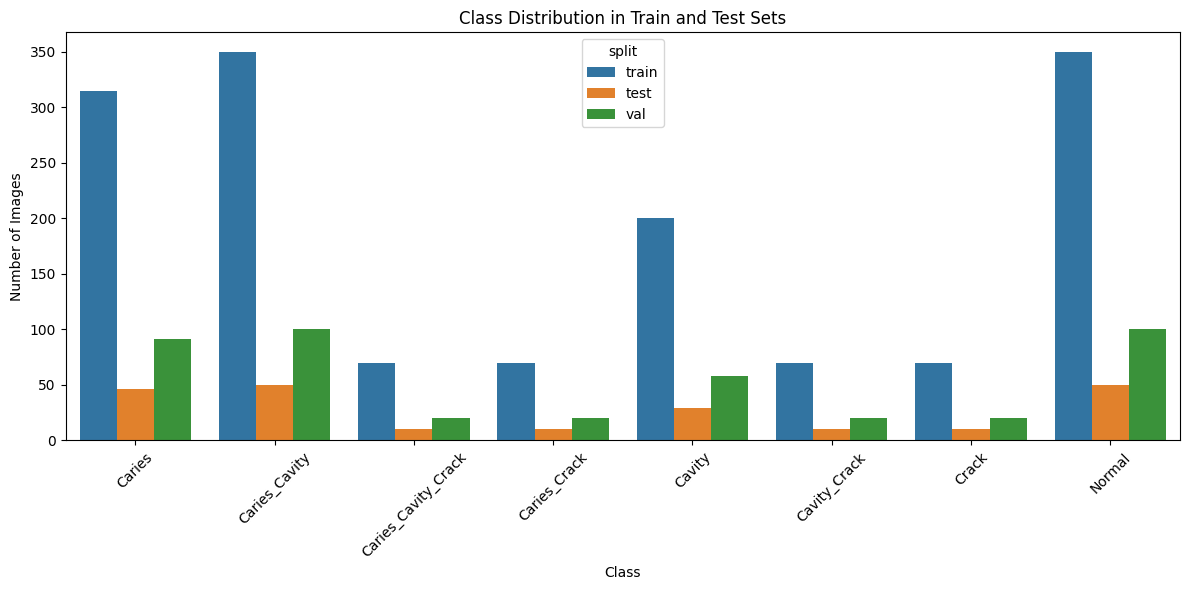

Plot saved to /home/malik-harris/dental/plots/class_distribution_train_test.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

final_data_dir = "data/Final_data"
splits = ["train", "test",  "val"]


plots_dir = os.path.abspath(os.path.join(final_data_dir, "../../plots"))
os.makedirs(plots_dir, exist_ok=True)

dfs = []
for split in splits:
    csv_path = os.path.join(final_data_dir, f"{split}_labels.csv")
    df = pd.read_csv(csv_path)
    df["split"] = split
    dfs.append(df)
df_all = pd.concat(dfs)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_all, x="label", hue="split", order=sorted(df_all["label"].unique()))
plt.title("Class Distribution in Train and Test Sets")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()


plot_path = os.path.join(plots_dir, "class_distribution_train_test.png")
plt.savefig(plot_path)
plt.show()
plt.close()
print(f"Plot saved to {plot_path}")